In [2]:
import pandas as pd
import os
import numpy as np
%load_ext autoreload
%autoreload 2
import pipeline as pipe
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11, 4)})

## Reading the Data

In [3]:
claims = pipe.read_all()

## Data Preperation

In [4]:
claims = pipe.log_transform(claims, ['reimb2010','reimb2009','reimb2008'])

In [5]:
claims["race"] = claims["race"].str.replace("Block", "Black")

In [6]:
claims = claims.drop(columns = ["Unnamed: 0"])

In [8]:
claims = pipe.onehot(claims, ["race"])

In [10]:
train, test = pipe.train_test(claims, 0.2, random_ = 5597)

In [11]:
pipe.fill_all_missing(claims)

In [18]:
cols_norm = ["acuity", "costTrend", "monthsWithClaims", 
             "log(reimb2009+ 1)", "log(reimb2010+ 1)", "log(reimb2008+ 1)"]

In [19]:
train_n, test_n = pipe.normalize(train, test, cols_norm)

In [20]:
train_n

,age2010,male,heart.failure,kidney,cancer,copd,depression,diabetes,ihd,osteoporosis,...,acuity,costTrend,monthsWithClaims,log(reimb2010+ 1),log(reimb2009+ 1),log(reimb2008+ 1),race_Black,race_Hispanic,race_Other,race_White
94448,72,1,1,0,0,0,0,1,1,1,...,-0.867864,-0.166693,0.930400,-0.489012,0.243788,0.434929,0,0,0,1
82322,28,0,0,0,0,0,0,0,0,0,...,0.369275,-0.506059,-1.051994,-2.126832,-0.311882,-0.152792,0,0,0,1
15975,83,0,0,0,0,0,0,1,0,0,...,-0.220050,2.165657,-1.299793,-2.126832,-0.471269,-2.002770,0,0,0,1
147,89,0,0,0,0,0,0,0,0,0,...,0.307241,0.591755,-1.423693,-0.431398,-0.817075,-0.907859,0,1,0,0
58640,80,1,1,0,1,1,1,1,1,1,...,0.104608,0.626570,0.682600,0.637355,0.794980,0.339676,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171339,54,1,1,0,0,0,0,0,1,1,...,-0.765140,-0.408040,0.187002,0.563753,-0.068686,0.155698,0,0,0,1
190255,72,0,1,0,0,0,0,1,0,0,...,1.344974,0.738402,-0.184697,0.382647,0.982075,-0.281591,0,0,0,1
64558,70,0,0,0,0,0,0,0,0,0,...,-1.289279,-0.389145,-1.795391,-2.126832,-2.331081,-2.002770,1,0,0,0
19664,68,0,1,0,0,0,0,1,1,1,...,-0.405040,-1.434122,0.806500,0.493325,0.442053,0.678665,0,0,0,1


In [22]:
train_features = train_n.loc[:,'age2010':'race_White'].drop(columns = ["log(reimb2010+ 1)"])
train_targets = train.loc[:,'log(reimb2010+ 1)']
test_features = test_n.loc[:,'age2010':'race_White'].drop(columns = ["log(reimb2010+ 1)"])
test_targets = test.loc[:,"log(reimb2010+ 1)"]

In [23]:
train_features

,age2010,male,heart.failure,kidney,cancer,copd,depression,diabetes,ihd,osteoporosis,...,Ambulance,acuity,costTrend,monthsWithClaims,log(reimb2009+ 1),log(reimb2008+ 1),race_Black,race_Hispanic,race_Other,race_White
94448,72,1,1,0,0,0,0,1,1,1,...,0,-0.867864,-0.166693,0.930400,0.243788,0.434929,0,0,0,1
82322,28,0,0,0,0,0,0,0,0,0,...,1,0.369275,-0.506059,-1.051994,-0.311882,-0.152792,0,0,0,1
15975,83,0,0,0,0,0,0,1,0,0,...,0,-0.220050,2.165657,-1.299793,-0.471269,-2.002770,0,0,0,1
147,89,0,0,0,0,0,0,0,0,0,...,0,0.307241,0.591755,-1.423693,-0.817075,-0.907859,0,1,0,0
58640,80,1,1,0,1,1,1,1,1,1,...,2,0.104608,0.626570,0.682600,0.794980,0.339676,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171339,54,1,1,0,0,0,0,0,1,1,...,0,-0.765140,-0.408040,0.187002,-0.068686,0.155698,0,0,0,1
190255,72,0,1,0,0,0,0,1,0,0,...,1,1.344974,0.738402,-0.184697,0.982075,-0.281591,0,0,0,1
64558,70,0,0,0,0,0,0,0,0,0,...,0,-1.289279,-0.389145,-1.795391,-2.331081,-2.002770,1,0,0,0
19664,68,0,1,0,0,0,0,1,1,1,...,1,-0.405040,-1.434122,0.806500,0.442053,0.678665,0,0,0,1


In [24]:
ev = {}

## Lasso Regression

In [25]:
def metrics(target_predict,test_targets,train_features,train_targets,regr,output=True):
    
    bias = mean_squared_error(regr.predict(train_features),train_targets)
    mse = mean_squared_error(target_predict,test_targets)
    rss = np.sum((target_predict - test_targets) ** 2)
    variance = regr.score(train_features, train_targets)
    
    if output:
        print("Bias: %.2f" % bias)   
        print("Mean squared error: %.2f" % mse)
        print("RSS: %.2f" % rss)
        print('Variance score: %.2f\n' % variance)
    
    return(bias,mse,rss,variance)

In [26]:
print(list(train_features), '\n\n')
ls = linear_model.Lasso(alpha=0.5)
ls.fit(train_features,train_targets)
target_predict = ls.predict(test_features)
print('{}\n'.format(ls.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'log(reimb2009+ 1)', 'log(reimb2008+ 1)', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White'] 


[ 0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.03623872  0.05931384  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.        ]



In [27]:
ev["Lasso"] = metrics(target_predict,test_targets,train_features,train_targets,ls)

Bias: 1.03
Mean squared error: 1.03
RSS: 211706.74
Variance score: 0.34



In [28]:
coefs = ls.coef_

In [29]:
train_features_cols = list(train_features)

In [30]:
coef_results = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs)), orient = "index", columns = ["Coef"]).reset_index()

In [31]:
coef_results.rename(columns = {"index": "variable"}, inplace = True)

Text(0, 0.5, 'Coefficent')

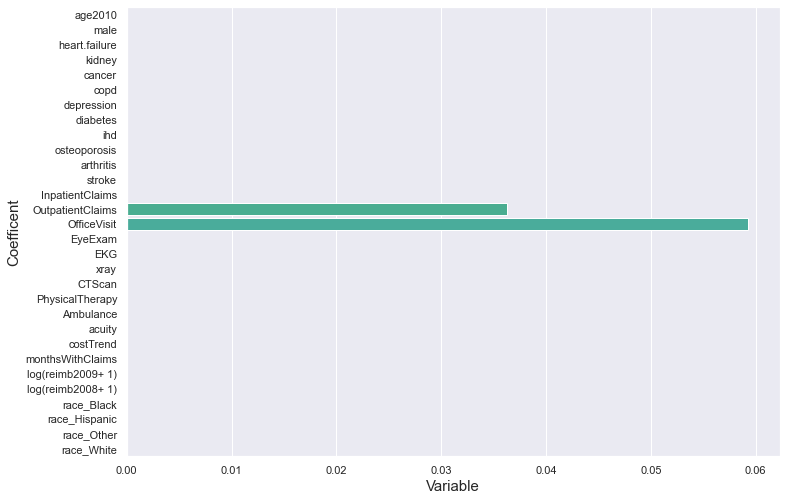

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results)
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)

## Ridge Regression

In [35]:
print(list(train_features), '\n\n')
rg = linear_model.Ridge(alpha=0.5)
rg.fit(train_features,train_targets)
target_predict = rg.predict(test_features)
print('{}\n'.format(rg.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'log(reimb2009+ 1)', 'log(reimb2008+ 1)', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White'] 


[ 5.04948084e-04 -8.16573957e-03  2.76277540e-03 -1.25265517e-02
 -1.74380227e-02 -4.47326045e-03  4.55079303e-04  3.58752628e-02
  3.73462405e-02 -3.40113413e-04 -6.44989548e-04 -3.14314783e-02
 -7.82345574e-02 -2.43820968e-03 -6.72767950e-03 -1.12033899e-02
 -2.42868477e-03 -2.66482687e-03 -1.43633022e-03 -1.87608313e-03
  1.53758306e-03 -1.05275368e-01  6.44848821e-02  3.09457421e-01
  4.62662331e-01  3.37586263e-01 -3.88316052e-03 -4.81424851e-03
 -7.94211098e-03  1.66395188e-02]



In [36]:
coefs_r = rg.coef_

In [37]:
coef_results_r = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs_r)),
                                        orient = "index", columns = ["Coef"]).reset_index()

In [38]:
coef_results_r.rename(columns = {"index": "variable"}, inplace = True)

Text(0, 0.5, 'Coefficent')

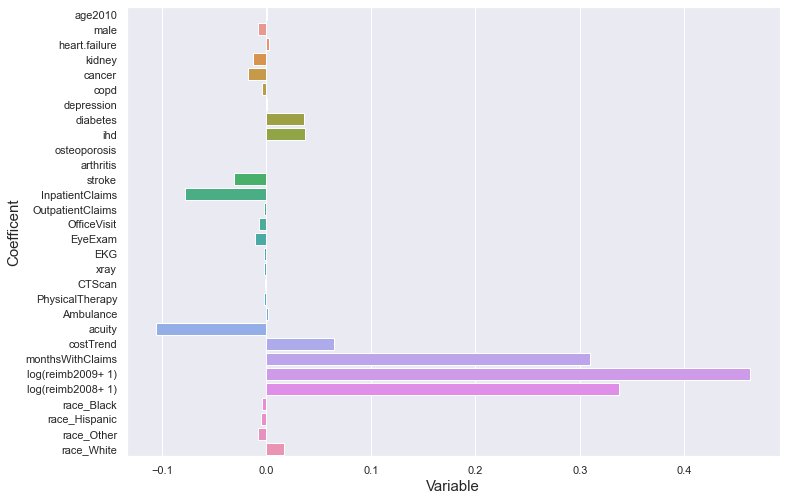

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results_r)
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)

In [40]:
ev["Ridge"] = metrics(target_predict,test_targets,train_features,train_targets,rg)

Bias: 0.61
Mean squared error: 0.61
RSS: 125466.20
Variance score: 0.61



## Elastic Net

In [41]:
print(list(train_features), '\n\n')
en = linear_model.ElasticNet(alpha=0.5)
en.fit(train_features,train_targets)
target_predict = en.predict(test_features)
print('{}\n'.format(en.coef_))

['age2010', 'male', 'heart.failure', 'kidney', 'cancer', 'copd', 'depression', 'diabetes', 'ihd', 'osteoporosis', 'arthritis', 'stroke', 'InpatientClaims', 'OutpatientClaims', 'OfficeVisit', 'EyeExam', 'EKG', 'xray', 'CTScan', 'PhysicalTherapy', 'Ambulance', 'acuity', 'costTrend', 'monthsWithClaims', 'log(reimb2009+ 1)', 'log(reimb2008+ 1)', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White'] 


[ 0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.02627843  0.04104275  0.          0.          0.
  0.          0.         -0.         -0.          0.          0.0391445
  0.19584288  0.08578994 -0.         -0.         -0.          0.        ]



In [42]:
coefs_en = en.coef_

In [43]:
coef_results_en = pd.DataFrame.from_dict(dict(zip(train_features_cols, coefs_en)),
                                         orient = "index", columns = ["Coef"]).reset_index()

In [44]:
coef_results_en.rename(columns = {"index": "variable"}, inplace = True)

Text(0, 0.5, 'Coefficent')

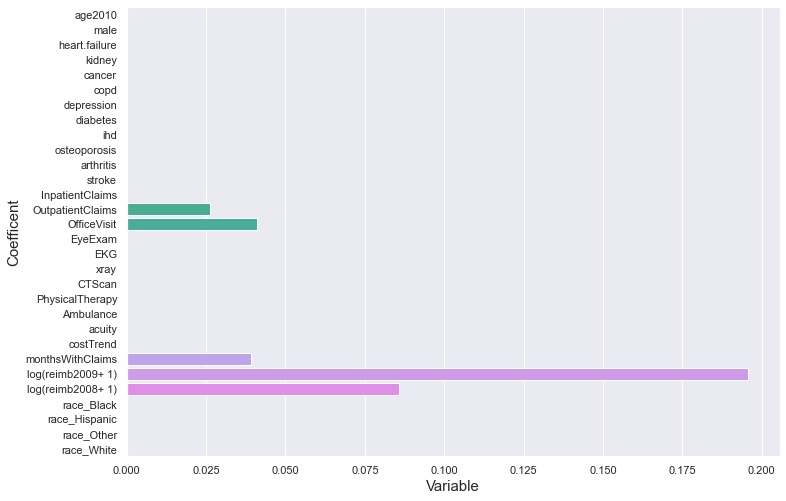

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = "variable", x = "Coef", data = coef_results_en)
plt.xlabel("Variable", size=15)
plt.ylabel("Coefficent", size=15)

In [46]:
ev["Elastic Net"] = metrics(target_predict,test_targets,train_features,train_targets,en)

Bias: 0.82
Mean squared error: 0.82
RSS: 168616.51
Variance score: 0.47



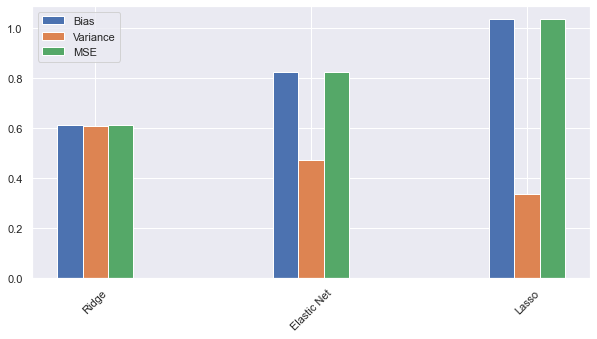

In [47]:
plt.rcParams['figure.figsize'] = [10, 5]

mdf = pd.DataFrame(ev).transpose()

mdf.index.name = 'Type'
mdf.rename(columns={0:'Bias',1:'MSE',2:'RSS',3:'Variance'},inplace=True)
mdf.sort_values(by=['Bias'],inplace=True)

labels = mdf.index.values
x = np.arange(len(labels))
width = 0.35  

fix, ax = plt.subplots()
rects = ax.bar(x - width/3, mdf['Bias'], width/3, label='Bias')
rects = ax.bar(x, mdf['Variance'], width/3, label='Variance')
rects = ax.bar(x + width/3, mdf['MSE'], width/3, label='MSE')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.show()